<a href="https://colab.research.google.com/github/JakeEisner/ECON3916-Statistical-Machine-Learning/blob/main/Lab%207/%5BLab_7_%5D_Estimation_%E2%80%94_From_Formulas_to_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module A: The Law of Large Numbers (FanDuel/DraftKings)
Objective: Visualizing why "The House Always Wins" and calculating Sampling Error.

🤔 What does "-110 Odds" mean?
In Sports Betting, "-110" represents the price of the bet (The "Vig" or Vigorish).

The Math: You must bet $110 to win $100.
The Implied Probability: To break even, you cannot just win 50% of the time. You must win:
110 / (110 + 100) = 0.5238 (52.38%)

If you are an average guesser (50% win rate), the Law of Large Numbers guarantees you will lose money over time because 50% < 52.38%.



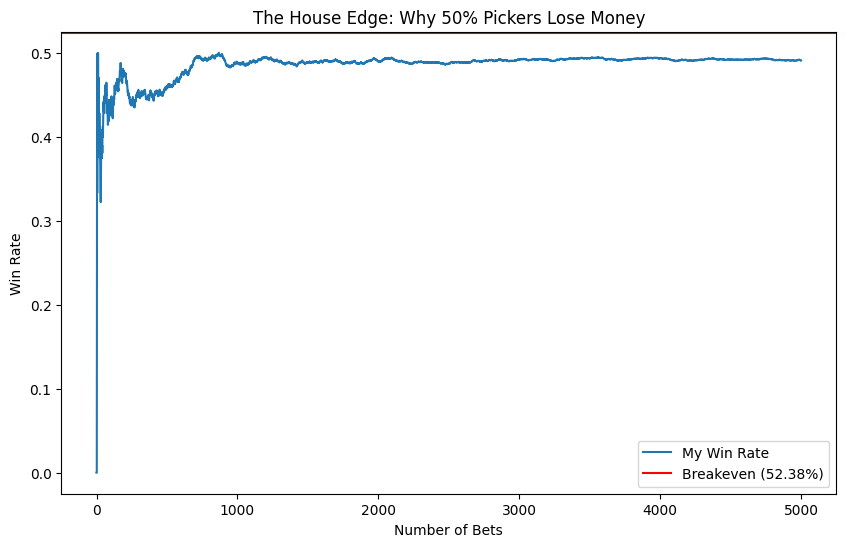

In [21]:
# Step 1: The Convergence Simulation
'''
We simulate a 50% bettor over 5,000 bets to see the win rate stabilize below the
profitability line.
'''

import numpy as np
import matplotlib.pyplot as plt

# 1. Setup
true_skill = 0.50       # You win 50% of the time
breakeven = 0.5238      # -110 odds requires 52.38% to profit
n_bets = 5000           # Simulating a full season

# 2. Simulate
outcomes = np.random.choice([0,1],size=n_bets,p=[1-true_skill,true_skill])
cumulative_win_rate = np.cumsum(outcomes) / np.arange(1, n_bets + 1)

# 3. Plot
plt.figure(figsize=(10,6))
plt.plot(cumulative_win_rate, label="My Win Rate")
plt.axhline(breakeven, color='red', label="Breakeven (52.38%)")
plt.legend()
plt.title("The House Edge: Why 50% Pickers Lose Money")
plt.xlabel("Number of Bets")
plt.ylabel("Win Rate")
plt.show()

Sampling Error Audit:
Sample 1: Mean = 34.53% | Error = -0.74%
Sample 2: Mean = 34.17% | Error = -1.10%
Sample 3: Mean = 35.79% | Error = +0.52%


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4082391486.py:4: SyntaxWarning: invalid escape sequence '\m'
  ($n=50$). We compare our sample mean ($\bar{x}$) to the true mean ($\mu$).


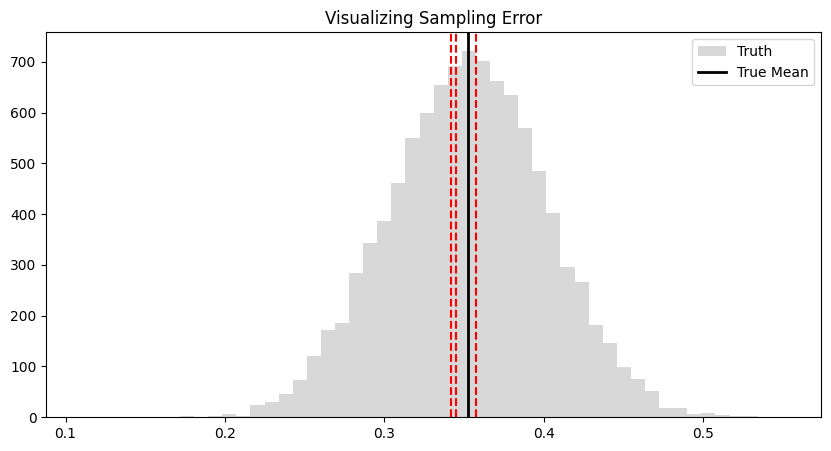

In [22]:
# Step 2: Visualizing Sampling Error
'''
In the real world, we don't see the infinite curve. We only see our small sample
($n=50$). We compare our sample mean ($\bar{x}$) to the true mean ($\mu$).
'''

# 1. The "Unknown" Truth
true_mu = 0.3527  # Matching the "True Population Mean"

# 2. Simulate 3 distinct "Samples" (e.g., 3 different users)
samples = []
print(f"Sampling Error Audit:")

for i in range(3):
    # Draw 50 random bets
    sample = np.random.normal(true_mu,0.05,50)


    # Calculate stats
    x_bar = np.mean(sample)
    error =  x_bar - true_mu # The Formula: Error = x_bar - mu

    print(f"Sample {i+1}: Mean = {x_bar:.2%} | Error = {error:+.2%}")
    samples.append(x_bar)

# 3. Quick Visual Check
plt.figure(figsize=(10,5))
plt.hist(np.random.normal(true_mu, 0.05, 10000), bins=50, alpha=0.3, color='gray', label='Truth')
for mean in samples:
    plt.axvline(mean, color='red', linestyle='--') # Our Samples
plt.axvline(true_mu, color='black', linewidth=2, label='True Mean')
plt.title("Visualizing Sampling Error")
plt.legend()
plt.show()




Module B: The Central Limit Theorem (Crypto Returns)
Objective: Proving the CLT works even in "Fat Tailed" environments like Crypto.

In 2025, Crypto returns followed a Log-Normal distribution (skewed, fat tails). This creates a "Trap" where traditional models fail unless we understand Sampling Distributions.

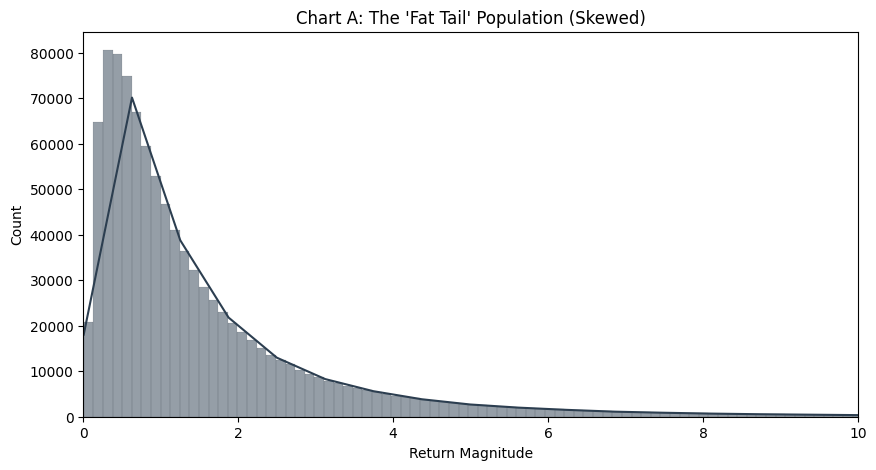

In [23]:
# Step 1: Visualizing "The Chaos" (Population)
'''
We generate a highly skewed population representing Bitcoin returns to see the
non-normal "hump" and tail.
'''

import seaborn as sns

# 1. Define the "Crypto Universe" (Population)
# Log-Normal matches the skewed "Hump + Long Tail" shape of markets
population_data = np.random.lognormal(mean=0, sigma=1.0, size=1000000)

# 2. Visualize the Chaos
plt.figure(figsize=(10, 5))
sns.histplot(population_data, bins=1000, kde=True, color='#2c3e50')
plt.xlim(0, 10)  # Crop to see the shape clearly
plt.title("Chart A: The 'Fat Tail' Population (Skewed)")
plt.xlabel("Return Magnitude")
plt.show()


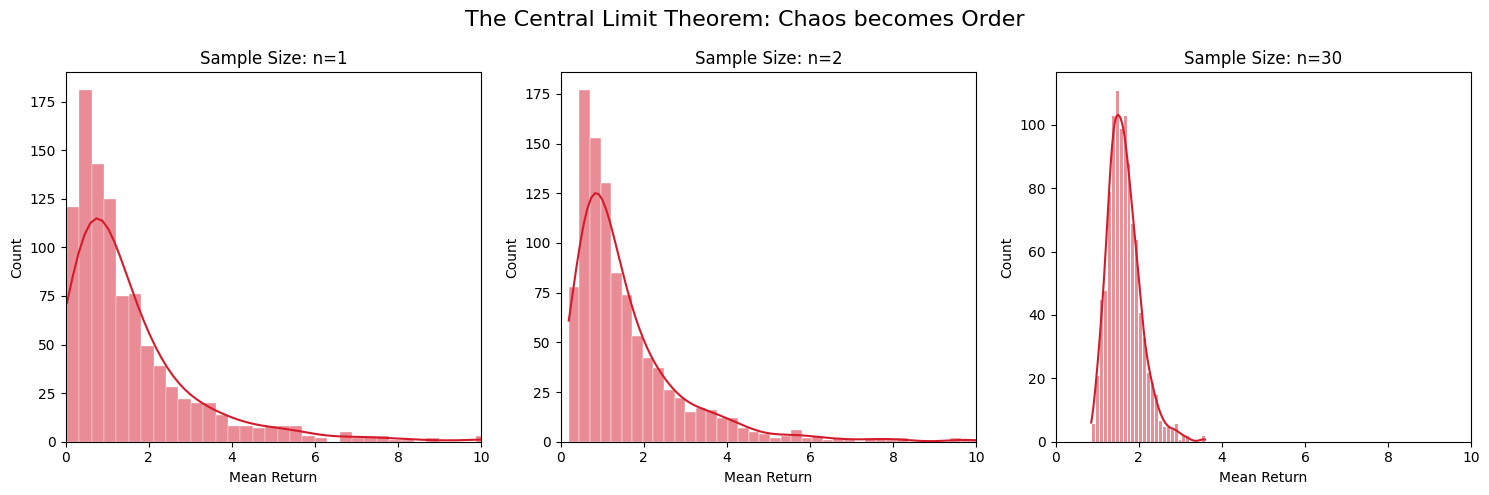

In [24]:
# Step 2: The CLT Simulation ($n=1, 2, 30$)
'''
We prove that as we increase sample size ($n$), the distribution
of the means becomes Normal, regardless of the underlying chaos.
'''

# Setup: Compare 3 sample sizes to match the slide
sample_sizes = [1, 2, 30]
simulations = 1000

plt.figure(figsize=(15, 5))

for i, n in enumerate(sample_sizes):
    # 1. The Loop: Calculate 1000 averages
    means = []
    for _ in range(simulations):
        sample = np.random.choice(population_data, size=n)
        means.append(np.mean(sample))

    # 2. Plotting
    plt.subplot(1, 3, i+1)
    sns.histplot(means, kde=True, color='#d41b2c', edgecolor='white')
    plt.title(f"Sample Size: n={n}")
    plt.xlabel("Mean Return")
    plt.xlim(0, 10)

plt.suptitle("The Central Limit Theorem: Chaos becomes Order", fontsize=16)
plt.tight_layout()
plt.show()

4. Module C: The Series C SaaS Metric (LTV/CAC)
Objective: Calculating Confidence Intervals for Venture Capital benchmarks.

In [41]:
# Part 1: The Soup Analogy (Does Population Size Matter?)
'''
Students often ask: "If I have 1 million users, do I need a huge sample?"
The answer is NO. A teaspoon tells you the flavor of the soup whether the pot
is 1 quart or 100 gallons.
'''

# 1. Setup: Two Populations, same variance, vastly different sizes
std_dev = 15000  # Variation in spending
n = 100          # We only sample 100 users (The "Teaspoon")

# 2. Calculate Margin of Error (1.96 * sigma / sqrt(n))
# Notice: Big 'N' (Population Size) is NOT in this formula!
margin_error = 1.96 * std_dev / np.sqrt(n)
margin_error_2 = 1.96 * std_dev / np.sqrt(1000000)

print(f"--- The Soup Analogy ---")
print(f"Population: 1,000 users   | Margin of Error: ±${margin_error:,.2f}")
print(f"Population: 1,000,000 users | Margin of Error: ±${margin_error_2:,.2f}")
print(f"Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.")

--- The Soup Analogy ---
Population: 1,000 users   | Margin of Error: ±$2,940.00
Population: 1,000,000 users | Margin of Error: ±$29.40
Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.


In [42]:
# Part 2: The VC Audit (Robust vs. Volatile)
'''
A SaaS startup claims an LTV/CAC Ratio of 4.0. We check the
lower bound of the Confidence Interval to determine risk.
'''

# Metric: LTV/CAC Ratio (Target > 3.0)
mean_val = 4.0
n_samples = 50

# Compare Stable (A) vs Volatile (B) Companies
sigma_A = 0.5  # Stable
sigma_B = 6.0  # Volatile

moe_A = 1.96 * (sigma_A / np.sqrt(n_samples))
moe_B = 1.96 * (sigma_B / np.sqrt(n_samples))

print("\n--- VC Audit: Series C Benchmark (> 3.0) ---")

print(f"Startup A (Stable):")
print(f"   95% CI: [{mean_val - moe_A:.1f}, {mean_val + moe_A:.1f}]")
print(f"   Decision: INVEST. (Lower bound > 3.0)")

print(f"\nStartup B (Volatile):")
print(f"   95% CI: [{mean_val - moe_B:.1f}, {mean_val + moe_B:.1f}]")
print(f"   Decision: PASS. (Lower bound implies potential loss)")


--- VC Audit: Series C Benchmark (> 3.0) ---
Startup A (Stable):
   95% CI: [3.9, 4.1]
   Decision: INVEST. (Lower bound > 3.0)

Startup B (Volatile):
   95% CI: [2.3, 5.7]
   Decision: PASS. (Lower bound implies potential loss)


5. Phase 4: GenAI Expansion — The "P.R.I.M.E." Protocol
Objective: We will simulate a startup's runway. First, we build a "Naive" model manually (assuming Revenue and Costs are unrelated). Then, you will use AI to introduce Correlation (The "Real World").

In [43]:
# Step 1: The "Naive" Simulation (Manual Code)
'''
This code represents a startup with $2M in the bank, trying to survive
24 months. We assume Revenue and Burn are independent random variables.
'''

import numpy as np

# BASE CASE: Independence Assumption (The "Naive" Model)
n_simulations = 1000
months = 24
start_cash = 2_000_000
bankruptcies = 0

print("Running Base Model (Independence)...")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # SIMULATION LOGIC:
        # Revenue: Average $80k, swings wildly (StdDev $30k)
        # Burn: Average $100k, fairly fixed (StdDev $10k)
        # INDEPENDENT: Bad revenue months don't automatically trigger cost cuts.

        revenue = np.random.normal(80000, 30000)
        burn = np.random.normal(100000, 10000)

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin = bankruptcies / n_simulations
print(f"Base Model Risk of Ruin: {prob_ruin:.1%}")
print("Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.")

Running Base Model (Independence)...
Base Model Risk of Ruin: 0.0%
Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.


Step 2: The "Co-Pilot" Expansion (GenAI)
🧐 The Problem
In the real world, Revenue and Burn are Correlated (~0.7). If Revenue drops, Management cuts Burn to survive. The "Naive" code above misses this, likely overstating the risk.

The Task: Use the P.R.I.M.E. Protocol to fix the code above using an LLM (ChatGPT/Gemini/Claude).